In [18]:
import mxnet as mx
from mxnet import nd

In [19]:
probabilities = nd.ones(6) / 6
nd.sample_multinomial(probabilities)


[2]
<NDArray 1 @cpu(0)>

In [20]:
nd.sample_multinomial??

In [21]:
print(nd.sample_multinomial(probabilities, shape=(10)))
print(nd.sample_multinomial(probabilities, shape=(5,10)))


[2 5 3 0 1 5 1 4 0 0]
<NDArray 10 @cpu(0)>

[[3 1 4 3 4 4 5 2 0 1]
 [3 2 3 5 3 5 5 5 0 4]
 [4 2 4 4 3 3 2 0 4 5]
 [0 3 2 5 3 2 4 4 0 2]
 [1 4 2 3 3 5 5 5 3 1]]
<NDArray 5x10 @cpu(0)>


In [22]:
rolls = nd.sample_multinomial(probabilities, shape=(1000))

In [23]:
counts = nd.zeros((6,1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

### count的第j列存储了第j次投色子后的次数

In [24]:
print(totals/1000)
print(counts) 


[ 0.17200001  0.163       0.185       0.152       0.153       0.175     ]
<NDArray 6 @cpu(0)>

[[   1.    1.    1. ...,  172.  172.  172.]
 [   0.    0.    0. ...,  162.  162.  163.]
 [   0.    1.    1. ...,  185.  185.  185.]
 [   0.    0.    0. ...,  152.  152.  152.]
 [   0.    0.    0. ...,  152.  153.  153.]
 [   0.    0.    1. ...,  175.  175.  175.]]
<NDArray 6x1000 @cpu(0)>


In [25]:
x = nd.arange(1000).reshape((1, 1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])


[ 1.  0.  0.  0.  0.  0.]
<NDArray 6 @cpu(0)>

[ 0.5  0.   0.5  0.   0.   0. ]
<NDArray 6 @cpu(0)>

[ 0.15841584  0.17821783  0.18811882  0.20792079  0.06930693  0.1980198 ]
<NDArray 6 @cpu(0)>


In [26]:
from matplotlib import pyplot as plt

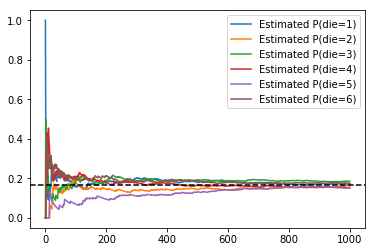

In [27]:
plt.plot(estimates[0, :].asnumpy(), label="Estimated P(die=1)")
plt.plot(estimates[1, :].asnumpy(), label="Estimated P(die=2)")
plt.plot(estimates[2, :].asnumpy(), label="Estimated P(die=3)")
plt.plot(estimates[3, :].asnumpy(), label="Estimated P(die=4)")
plt.plot(estimates[4, :].asnumpy(), label="Estimated P(die=5)")
plt.plot(estimates[5, :].asnumpy(), label="Estimated P(die=6)")
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

In [28]:
import numpy as np
batch_size = 1
# we go over one observation at a time (speed doesn't matter here)
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)
mnist_train = mx.gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = mx.gluon.data.vision.MNIST(train=False, transform=transform)

In [29]:
mnist_train

## 已知yi的情况下，出现图片x的概率是由已知yi的前提下x的每个像素概率的乘积
像素点大部分是0，小部分也基本上接近1，所以可以认为它们是0-1分布的离散变量

In [30]:
import numpy as np

batch_size = 1
# we go over one observation at a time (speed doesn't matter here)
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)
mnist_train = mx.gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = mx.gluon.data.vision.MNIST(train=False, transform=transform)

# Initialize the count statistics for p(y) and p(x_i|y)
# We initialize all numbers with a count of 1 to ensure that we don't get a
# division by zero.  Statisticians call this Laplace smoothing.
ycount = nd.ones(shape=(10))
xcount = nd.ones(shape=(784, 10))

# Aggregate count statistics of how frequently a pixel is on (or off) for
# zeros and ones.
for data, label in mnist_train:
    x = data.reshape((784,))
    y = int(label)
    ycount[y] += 1
    xcount[:, y] += x


# normalize the probabilities p(x_i|y) (divide per pixel counts by total
# count)
for i in range(10):
    xcount[:, i] = xcount[:, i]/ycount[i]  # xcount的第i列是yi类别下的像素分布,xcount(m, i)可以认为是p(xm=1|yi),xm是第m个特征

# likewise, compute the probability p(y)
py = ycount / nd.sum(ycount)

In [32]:
print(py)


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>


In [33]:
xcount


[[ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]
 [ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]
 [ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]
 ..., 
 [ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]
 [ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]
 [ 0.0001688   0.0001483   0.00016781 ...,  0.00015959  0.00017088
   0.00016807]]
<NDArray 784x10 @cpu(0)>

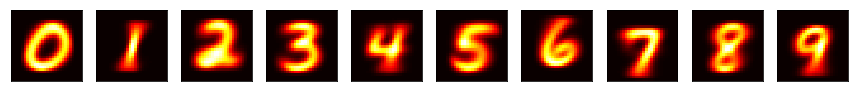


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>


In [141]:
import matplotlib.pyplot as plt
fig, figarr = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)

plt.show()
print(py)


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)
(784,) (784,) (1,)


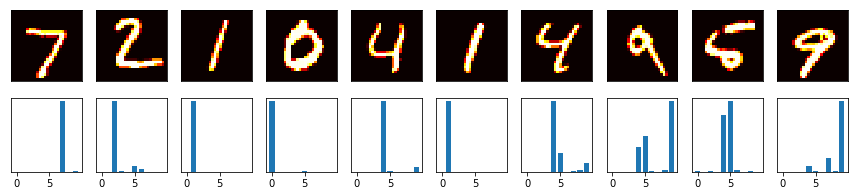

In [59]:
logxcount = nd.log(xcount)
logxcountneg = nd.log(1-xcount)
logpy = nd.log(py)
print(py)

input_num = 10
fig, figarr = plt.subplots(2, input_num, figsize=(15, 3))

# show 10 images
ctr = 0
for data, label in mnist_test:
    x = data.reshape((784,))
    y = int(label)

    # we need to incorporate the prior probability p(y) since p(y|x) is
    # proportional to p(x|y) p(y)
    logpx = logpy.copy()
    for i in range(10):
        # compute the log probability for a digit
        print(x.shape, logxcount[:, i].shape, nd.dot(logxcount[:, i], x).shape)
        logpx[i] = nd.dot(logxcount[:, i], x) + nd.dot(logxcountneg[:, i], 1-x)   # logpx为x在类别i下的概率（只考虑相对大小）
        logpx[i] *= py[i] # 我感觉应该要乘上先验概率
    # normalize to prevent overflow or underflow by subtracting the largest
    # value
    logpx -= nd.max(logpx)
    # and compute the softmax using logpx
    px = nd.exp(logpx).asnumpy()
    px /= np.sum(px)

    # bar chart and image of digit
    figarr[1, ctr].bar(range(10), px)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1
    if ctr == input_num:
        break

plt.show()